In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Chat.txt", delimiter = "\t", header = None, names = ['text'])
dataX = pd.read_csv("Chat.txt", delimiter = "\t", header = None, names = ['text'])
save_to_dir ="<<Directory>>"

In [3]:
data[['datetime_str','text_2']] = data['text'].str.split('-',1, expand= True)


In [4]:
#data.head()

In [5]:
data[['sender','text_message']] = data['text_2'].str.split(':',1, expand = True)

In [6]:
#data.head()

In [7]:
data = data.dropna(subset=['text_message'])

In [8]:
#data.head()

In [9]:
data = data.drop(columns = ['text','text_2'])

In [10]:
#data.head()

***

**Count of Messages by Contact**

***

In [11]:
contact_msg_count = data.groupby(['sender']).size().sort_values(ascending=False)

In [12]:
#sender_count

In [13]:
contact_msg_count_df = pd.DataFrame(contact_msg_count)

In [14]:
#contact_msg_count_df.head()

In [15]:
contact_msg_count_df = contact_msg_count_df.reset_index()

In [16]:
#contact_msg_count_df.head()

In [17]:
contact_msg_count_df.columns = ['sender','count']

In [18]:
contact_msg_count_df =contact_msg_count_df.head(13)

In [ ]:
plt.figure(figsize=(15, 10))
plt.bar(contact_msg_count_df['sender'], contact_msg_count_df['count'], color = 'orange')
plt.title("Message Counts by Contact", fontsize="20")
plt.xlabel("Sender")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.savefig(save_to_dir + "Active_by_Contact.jpeg")
plt.show();

In [42]:
#

***

**Removed the Image :) **

***

**************************************

***

**Word Cloud**

***

**************************************

In [20]:
from wordcloud import WordCloud
import nltk
#nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords_set = set(stopwords.words('english'))

In [21]:

word_cloud_df = data[~data['text_message'].str.contains("Media")]
#word_cloud_df.head()
wrds = word_cloud_df["text_message"]
wrds = " ".join(wrds).lower()
#wrds

In [22]:
# comment_words = ''

# for wrd in word_cloud_df["text_message"]:
#     val = str(wrd)
#     tokens = val.split()
#     for i in range(len(tokens)):
#         tokens[i] = tokens[i].lower()
     
#     comment_words += " ".join(tokens)+" "
    

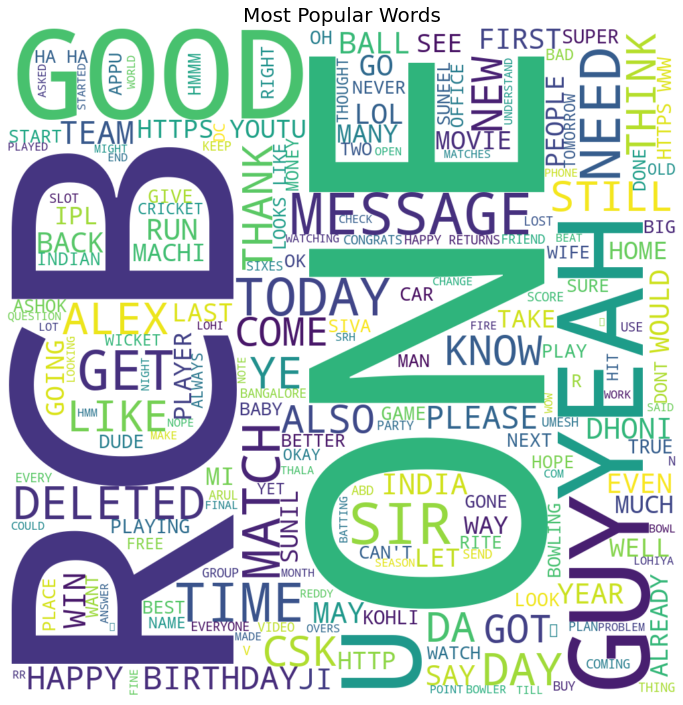

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=[12,15])


wordcloud = WordCloud(stopwords=stopwords_set,background_color = 'white', 
                      width = 1000,  
                      height = 1000,
                      colormap ='viridis'
                      ).generate(wrds.upper())


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Words',fontsize = 20)
plt.show();
plt.savefig(save_to_dir + "Word_Cloud.jpeg")


In [24]:
#data.head()

**************************************

***

**Find Active Months**

***

**************************************

In [25]:
dataX[['datetime_str','text_2']] = dataX['text'].str.split('-',1, expand= True)
dataX["cln_date"] = dataX["datetime_str"].str[0:8]
dataX["cln_date"] = pd.to_datetime(dataX["cln_date"], format="%d/%m/%y", errors ='coerce')
dataX["month"] = dataX["cln_date"].dt.month_name().str[:3]

In [26]:
date_data = dataX[['month','text']]
#date_data

In [27]:

active_months = date_data.groupby(["month"]).size().sort_values(ascending=False)
#active_months

In [28]:
active_months_df = pd.DataFrame(active_months)

In [29]:
active_months_df = active_months_df.reset_index()

In [30]:
active_months_df.columns = ['month','count']

In [31]:
#active_months_df.head()

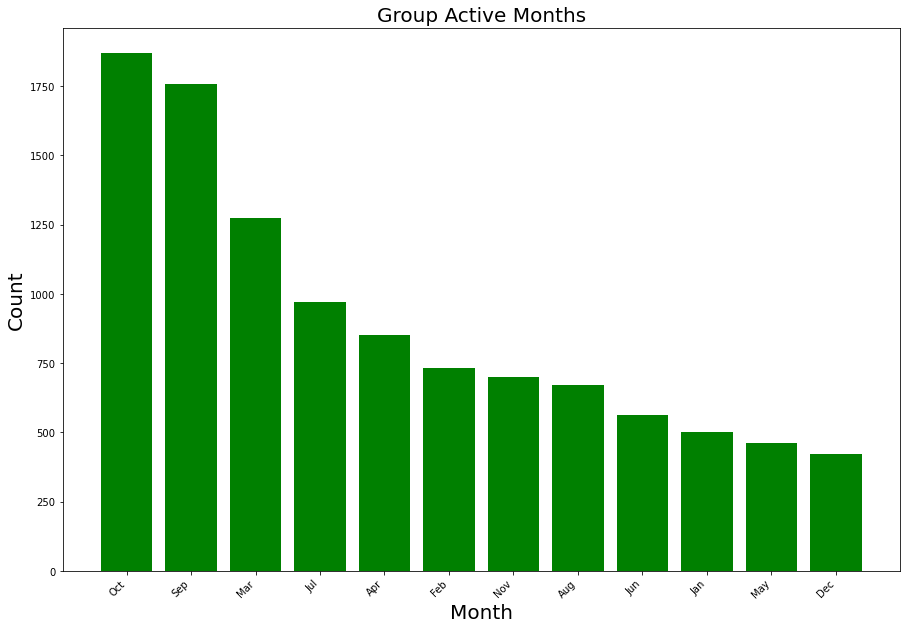

In [32]:
plt.figure(figsize=(15, 10))
plt.bar(active_months_df['month'], active_months_df['count'], color = 'green')
plt.title("Group Active Months",fontsize = 20)
plt.xlabel("Month",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xticks(rotation=45, ha="right")
plt.savefig(save_to_dir + "Months_Active.jpeg")
plt.show();

In [33]:
#dataX.head()

**************************************

***

**Find Active Hours in a Day**

***

**************************************

In [34]:
dataX["cln_date_hrs"] = dataX["datetime_str"].str.split(',').str[1]
dataX["cln_date_hrs"] = dataX["cln_date_hrs"].str.replace(' ','')
#dataX["cln_date_hrs"]

In [35]:

dataX["cln_date_hrs"] = pd.to_datetime(dataX["cln_date_hrs"], format='%I:%M%p', errors='coerce')
dataX["Hours"] = dataX["cln_date_hrs"].dt.hour
#dataX["Hours"]

In [36]:

# active_hours_df = pd.DataFrame(dataX[['Hours','text']].groupby(['Hours']).size().sort_values(ascending=False)).reset_index()
# active_hours_df.columns = ['Hours','Count']
# active_hours_df['Hours'] = active_hours_df['Hours'].astype(str) +' H'

In [37]:

active_hours_df = pd.DataFrame(dataX[['Hours','text']].groupby(['Hours']).size().sort_values(ascending=False)).reset_index()
active_hours_df.columns = ['Hours','Count']
active_hours_df.sort_values(by = ['Hours'])

,Hours,Count
7,0.0,479
15,1.0,328
19,2.0,118
21,3.0,40
23,4.0,13
22,5.0,37
20,6.0,82
17,7.0,204
18,8.0,182
14,9.0,351


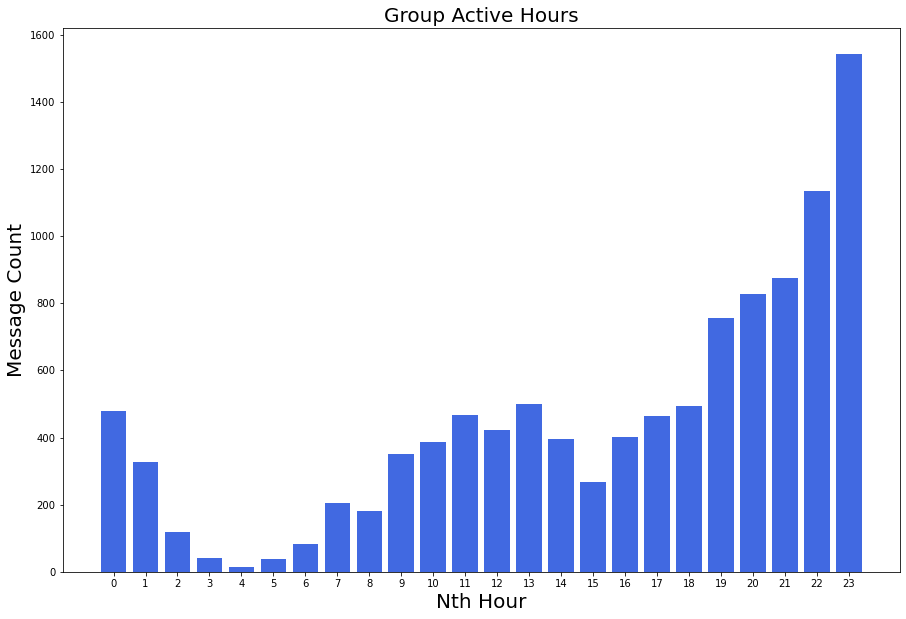

In [38]:
plt.figure(figsize=(15, 10))
plt.bar(active_hours_df['Hours'], active_hours_df['Count'], color = 'royalblue')
plt.title("Group Active Hours",fontsize = 20)
plt.xlabel("Nth Hour",fontsize = 20)
plt.ylabel("Message Count",fontsize = 20)
plt.xticks(np.arange(24))
plt.savefig(save_to_dir + "Hours_Active_new.jpeg")
plt.show();

**************************************

***

**Find Active Days in a Week**

***

**************************************

In [39]:
from datetime import datetime
dataX["day_of_week"] = dataX["cln_date"].dt.day_name()
active_days_df = pd.DataFrame(dataX[["day_of_week"]].groupby(['day_of_week']).size().sort_values(ascending=False)).reset_index()

In [40]:
active_days_df.columns = ['Days','Count']

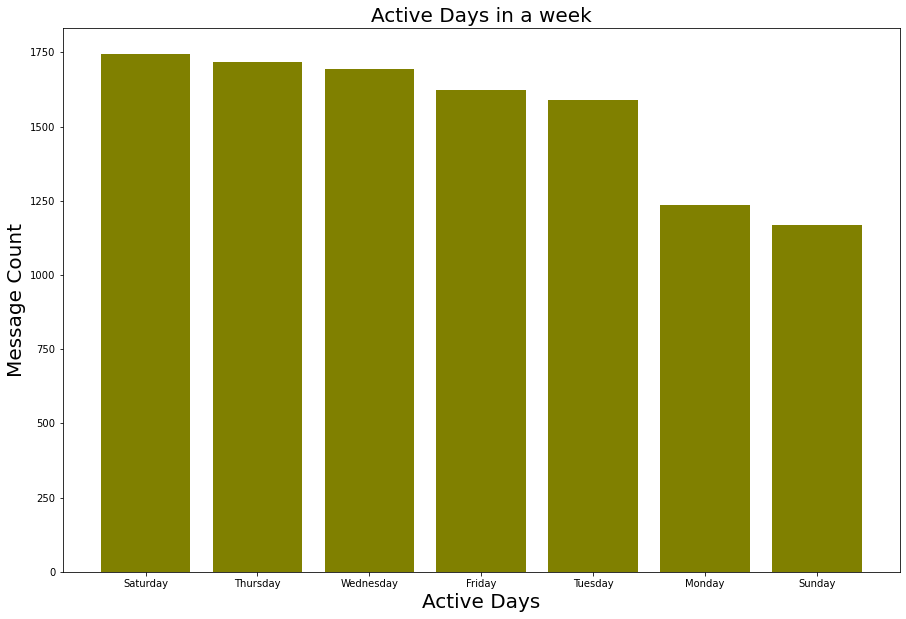

In [41]:
plt.figure(figsize=[15,10])
plt.title("Active Days in a week", fontsize=20)
plt.xlabel("Active Days", fontsize=20)
plt.ylabel("Message Count", fontsize=20)
plt.bar(active_days_df['Days'],active_days_df['Count'], color = "olive")
plt.savefig(save_to_dir + "Days_Active.jpeg")
plt.show();